In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
main_path = "../github/gridspace-stanford-harper-valley/data"
audio_path = os.path.join(main_path, "audio")
transcript_path = os.path.join(main_path, "transcript")
metadata_path = os.path.join(main_path, "metadata")

data_by_audio = {} ## dict of metadata by audio

In [3]:
### ADD Transcription data
speaker_roles = ["agent", "caller"]
emotions = ['positive', 'neutral', 'negative']

for md_file in os.listdir(transcript_path):
    file_data = {}
    file_data['transcript_path'] = os.path.join(transcript_path, md_file)
    with open(os.path.join(transcript_path, md_file), 'r') as f:
        data = json.load(f)

    emotion_categorisation_by_speaker = {"agent":[], "caller":[]}
    for dd in data:
        emotion = dd['emotion']
        emotion_categorisation_by_speaker[dd['speaker_role']].append([emotion[emot] for emot in emotions])

    for role in speaker_roles:
        role_emotion = np.array(emotion_categorisation_by_speaker[role])
        if False:
            display(Markdown(f"# Speaker {role}:"))
            display(Markdown(f"""
            - Min: {np.min(role_emotion, axis=0)}
            - Max: {np.max(role_emotion, axis=0)}
            - Mean: {np.mean(role_emotion, axis=0)}
            """))

        for idx, emot in enumerate(emotions): 
            file_data[f'{role}_{emot}_min'] = np.min(role_emotion, axis=0)[idx]
            file_data[f'{role}_{emot}_max'] = np.max(role_emotion, axis=0)[idx]
            file_data[f'{role}_{emot}_mean'] = np.mean(role_emotion, axis=0)[idx]

        ## positive ending ? positive>0.5 and negative<0.2
        if role_emotion[-1][emotions.index('positive')] > 0.45 and role_emotion[-1][emotions.index('negative')] < 0.25:
            file_data[f'{role}_positive_end'] = 1
        else: 
            file_data[f'{role}_positive_end'] = 0
        #print(role_emotion.shape, emotions.index('positive'))
        #break
    #display(Markdown(f"```{json.dumps(file_data, indent=4)}"))
    #break
    data_by_audio[md_file] = file_data

In [4]:
## ADD Metadata info to data

for md_file in os.listdir(metadata_path):
    with open(os.path.join(metadata_path, md_file), 'r') as f:
        data = json.load(f)
    #display(Markdown(f"```{json.dumps(data, indent=4)}"))
    #display(Markdown(f"# json keys \n {data.keys()}"))
    task_types = []
    for tsk in data["tasks"]:
        #task_keys.append(tsk.keys())
        task_types.append(tsk["task_type"])

    #if len(task_types)>1: 
    #    print(md_file)
    #    for tsk in data["tasks"]: print(f"   - {tsk["task_type"]}")
    #### there is no file with more than one task

    data_by_audio[md_file]["metadata_path"] = os.path.join(metadata_path, md_file)
    data_by_audio[md_file]["task_type"] = task_types[0]
    for itm in ["end_time_ms", "sid", "start_time_ms"]:
        data_by_audio[md_file][itm] = data[itm]

In [5]:
display(Markdown(f"```{json.dumps(data_by_audio[md_file], indent=4)}"))

```{
    "transcript_path": "../github/gridspace-stanford-harper-valley/data/transcript/504528a9558742ee.json",
    "agent_positive_min": 0.0,
    "agent_positive_max": 0.6813816428184509,
    "agent_positive_mean": 0.21688948969046276,
    "agent_neutral_min": 0.29096946120262146,
    "agent_neutral_max": 1.0,
    "agent_neutral_mean": 0.6430698335170746,
    "agent_negative_min": 0.0,
    "agent_negative_max": 0.36034464836120605,
    "agent_negative_mean": 0.14004067815840243,
    "agent_positive_end": 0,
    "caller_positive_min": 0.0,
    "caller_positive_max": 0.7709633111953735,
    "caller_positive_mean": 0.30239242501556873,
    "caller_neutral_min": 0.223173126578331,
    "caller_neutral_max": 1.0,
    "caller_neutral_mean": 0.5802813535556197,
    "caller_negative_min": 0.0,
    "caller_negative_max": 0.3100540339946747,
    "caller_negative_mean": 0.11732621205737814,
    "caller_positive_end": 0,
    "metadata_path": "../github/gridspace-stanford-harper-valley/data/metadata/504528a9558742ee.json",
    "task_type": "order checks",
    "end_time_ms": 1591057988459,
    "sid": "504528a9558742ee",
    "start_time_ms": 1591057905993
}

In [6]:
df = pd.DataFrame.from_dict(data_by_audio, orient='index')
df.head(2)

,transcript_path,agent_positive_min,agent_positive_max,agent_positive_mean,agent_neutral_min,agent_neutral_max,agent_neutral_mean,agent_negative_min,agent_negative_max,agent_negative_mean,...,caller_neutral_mean,caller_negative_min,caller_negative_max,caller_negative_mean,caller_positive_end,metadata_path,task_type,end_time_ms,sid,start_time_ms
370981f1f0254ebc.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.669074,0.231927,0.305246,1.000000,0.646108,0.000000,0.352726,0.121965,...,0.636434,0.000000,0.437344,0.127412,0,../github/gridspace-stanford-harper-valley/dat...,order checks,1591055907377,370981f1f0254ebc,1591055850335
735ce40fe6bb4eeb.json,../github/gridspace-stanford-harper-valley/dat...,0.209758,0.699268,0.473971,0.287287,0.575436,0.409853,0.013445,0.264655,0.116176,...,0.498659,0.103157,0.325805,0.235788,0,../github/gridspace-stanford-harper-valley/dat...,replace card,1584314504764,735ce40fe6bb4eeb,1584314467018


In [7]:
print('Number of positive endings:')
pos_ends = np.sum(df['caller_positive_end'])
print(f"{pos_ends}, {pos_ends/len(df):.2f} %")

Number of positive endings:
529, 0.37 %


## Analyse audio files statistics

In [8]:
## plot statistics 
columns = list(df.columns)

In [9]:
def draw_plot(data, cols, plot_filter, figsize=(6,3)):
    # Colors (one per column)
    colors = plt.cm.tab20(np.linspace(0, 1, len(cols)))

    if False:
        fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=figsize, sharex=False)
        
        # -------------------------
        # 1. BOXPLOT SUBPLOT
        # -------------------------
        bp = ax_box.boxplot(data.dropna(),
                            patch_artist=True)

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        ax_box.set_title(f"Boxplots of {plot_filter} Columns")
        ax_box.set_xticks(range(1, len(cols) + 1))
        ax_box.set_xticklabels(cols, rotation=45, ha='right')

        # Legend for boxplots
        legend_patches = [plt.Rectangle((0,0),1,1, color=c) for c in colors]
        ax_box.legend(legend_patches, cols, title="Columns", loc='upper right')

    else:
        fig, ax_hist = plt.subplots(figsize=figsize)

    # -------------------------
    # 2. HISTOGRAM SUBPLOT
    # -------------------------
    for col, color in zip(cols, colors):
        ax_hist.hist(df[col].dropna(), bins=30, alpha=0.5,
                    label=col, color=color)

    ax_hist.set_title(f"Histograms of {plot_filter} Columns")
    ax_hist.set_xlabel("Value")
    ax_hist.set_ylabel("Frequency")
    ax_hist.legend(title="Columns", loc='upper right')

    plt.tight_layout()
    plt.show()

# agent_positive

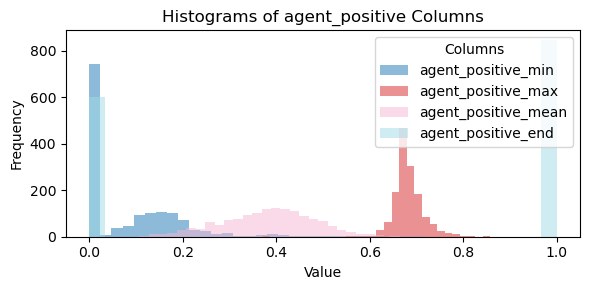

# agent_negative

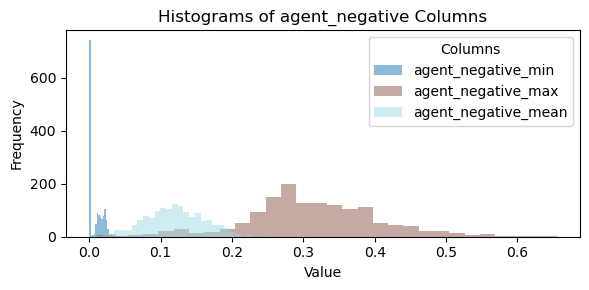

# caller_positive

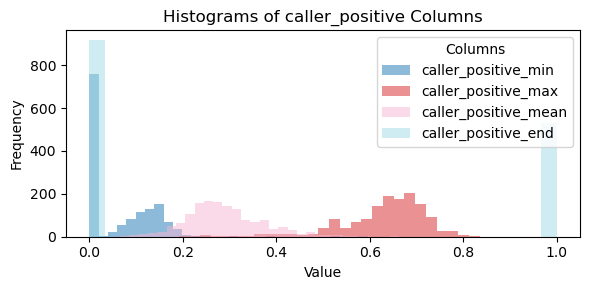

# caller_negative

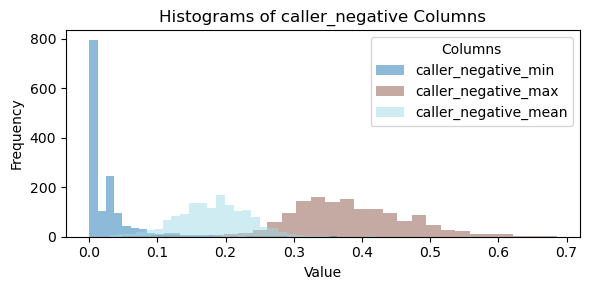

In [10]:
for speaker in ["agent", "caller"]:
    for emotion in ['positive', 'negative']:
        plot_filter = f"{speaker}_{emotion}"
        cols = [c for c in df.columns if plot_filter in c]
        display(Markdown(f"# {plot_filter}"))
        draw_plot(df[cols], cols, plot_filter)


# task_type

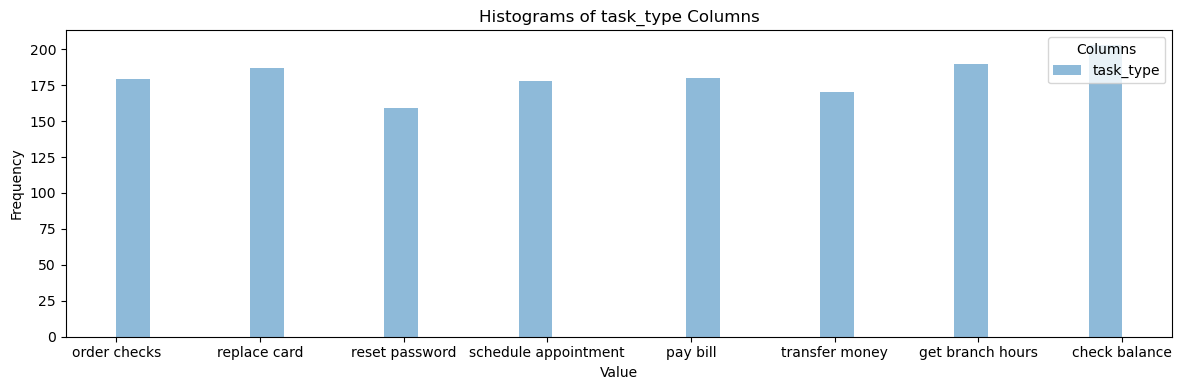

In [11]:
## plot histogram of the tasks:
plot_filter = "task_type"
cols = [c for c in df.columns if plot_filter in c]
display(Markdown(f"# {plot_filter}"))
draw_plot(df[cols], cols, plot_filter, figsize=(12,4))

## Pick up representative samples
To pick up the representative samples, we will create one code representing the following:
- task_type: each one will have a number
- caller negative sentiment: 0,1,2: negative_mean<0.3, 0.3<negative_mean<0.45, 0.45<negative_mean
- caller positive sentiment at the end of the call: 0,1 (no, yes)

In [76]:
task_types_ids={}
for idx,tsk in enumerate(df.task_type.unique()): task_types_ids[tsk] = idx

def get_code(row):
    code = ""
    ## task_type code
    #code += str(task_types_ids[row['task_type']]) 

    ## caller negative sentiment code
    #ng_mean = row['caller_negative_mean']
    #if ng_mean<0.3: code += "0"
    #elif ng_mean<0.45: code += "1"
    #else: code+="2"

    ## caller negative sentiment code --- NEW
    ng_mean = row['caller_negative_mean']
    ng_max = row['caller_negative_max']
    pos_mean = row['caller_positive_mean']
    pos_max = row['caller_positive_max']
    if ng_mean>0.32 and ng_max>0.25:
        code+="0" ## negative
    elif pos_mean>0.35:
        code+="1" ## positive
    else:
        code+="2" ## neutral

    ## caller positive sentiment at the end of the call:
    code += str(row['caller_positive_end'])
    return code

df["code"] = df.apply(get_code, axis=1)
df.head(2)

,transcript_path,agent_positive_min,agent_positive_max,agent_positive_mean,agent_neutral_min,agent_neutral_max,agent_neutral_mean,agent_negative_min,agent_negative_max,agent_negative_mean,...,caller_negative_min,caller_negative_max,caller_negative_mean,caller_positive_end,metadata_path,task_type,end_time_ms,sid,start_time_ms,code
370981f1f0254ebc.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.669074,0.231927,0.305246,1.000000,0.646108,0.000000,0.352726,0.121965,...,0.000000,0.437344,0.127412,0,../github/gridspace-stanford-harper-valley/dat...,order checks,1591055907377,370981f1f0254ebc,1591055850335,20
735ce40fe6bb4eeb.json,../github/gridspace-stanford-harper-valley/dat...,0.209758,0.699268,0.473971,0.287287,0.575436,0.409853,0.013445,0.264655,0.116176,...,0.103157,0.325805,0.235788,0,../github/gridspace-stanford-harper-valley/dat...,replace card,1584314504764,735ce40fe6bb4eeb,1584314467018,20


In [77]:
df[df['code']=="00"]

,transcript_path,agent_positive_min,agent_positive_max,agent_positive_mean,agent_neutral_min,agent_neutral_max,agent_neutral_mean,agent_negative_min,agent_negative_max,agent_negative_mean,...,caller_negative_min,caller_negative_max,caller_negative_mean,caller_positive_end,metadata_path,task_type,end_time_ms,sid,start_time_ms,code
5fbf82f4a2ca4db6.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.705533,0.392013,0.283004,1.000000,0.516192,0.000000,0.227865,0.091795,...,0.281094,0.405877,0.343746,0,../github/gridspace-stanford-harper-valley/dat...,get branch hours,1590860025687,5fbf82f4a2ca4db6,1590859989728,00
b732044bde7c45f3.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.644756,0.216585,0.335013,1.000000,0.616123,0.000000,0.300281,0.167292,...,0.164399,0.483884,0.333905,0,../github/gridspace-stanford-harper-valley/dat...,check balance,1584310966530,b732044bde7c45f3,1584310889117,00
fc66c1a1c15546c7.json,../github/gridspace-stanford-harper-valley/dat...,0.191582,0.669487,0.527563,0.307406,0.531081,0.377782,0.023106,0.277338,0.094655,...,0.362973,0.476760,0.420048,0,../github/gridspace-stanford-harper-valley/dat...,check balance,1590863194286,fc66c1a1c15546c7,1590863146634,00
637938e7c1194810.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.648384,0.310393,0.330528,1.000000,0.537619,0.000000,0.303496,0.151988,...,0.127903,0.478213,0.337084,0,../github/gridspace-stanford-harper-valley/dat...,transfer money,1584313299341,637938e7c1194810,1584313263609,00
6ace9cd5b88d4c30.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.682764,0.369332,0.304094,1.000000,0.527014,0.000000,0.248319,0.103653,...,0.257472,0.483358,0.341642,0,../github/gridspace-stanford-harper-valley/dat...,check balance,1591058861283,6ace9cd5b88d4c30,1591058804243,00
8c8a5b0505d74c5d.json,../github/gridspace-stanford-harper-valley/dat...,0.000000,0.719676,0.252588,0.268360,1.000000,0.663952,0.000000,0.332475,0.083459,...,0.206118,0.603673,0.328819,0,../github/gridspace-stanford-harper-valley/dat...,order checks,1591055980580,8c8a5b0505d74c5d,1591055932101,00


In [78]:
np.unique(df.code, return_counts=True)

(array(['00', '01', '10', '11', '20', '21'], dtype=object),
 array([  6,   1, 107, 196, 803, 330]))

In [79]:
num_of_representative_samples = 10
samples_per_code_type = 3 #1 #len(df['code'].unique())//num_of_representative_samples
print(samples_per_code_type)

## Delete problematic files:
list_discarded = ['0cae8d624dc04b47', 'd73be060c5994ae3', '50f57d300f104fa3']
print('data before discard: ', len(df))
df = df[~df.sid.isin(list_discarded)]
print('data after discard: ', len(df))

#selected_samples = df.groupby("code", group_keys=False).sample(frac=num_of_representative_samples, random_state=42, replace=True)
#selected_samples = df.groupby("code", group_keys=False).sample(n=samples_per_code_type, random_state=42, replace=True)


## select only negative and positive
selected_samples = df[df.code.isin(["00", "11"])].groupby("code", group_keys=False).sample(n=samples_per_code_type, random_state=42, replace=True)
len(selected_samples), len(np.unique(df.code))


3
data before discard:  1443
data after discard:  1443


(6, 6)

In [80]:
selected_samples.to_csv('selected_samples_2.csv')